In [ ]:
# importing basic packages

import pandas as pd
import numpy as np
import yfinance as yf
import datetime as dt
import plotly.express as px
import math
import matplotlib.pyplot as plt
import plotly.graph_objects as go



In [ ]:
#mounting the notebook to my drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#setting the directory to the proper folder
import os
os.chdir("/content/drive/My Drive/Stock Algorithim")

Expolring the Data


In [ ]:
spyData=pd.read_csv("spydata.csv",index_col=0)

In [ ]:
print(len(spyData))

7717


In [ ]:
fig = go.Figure()
spyData['SMA5'] = spyData.Close.rolling(5).mean()
#The Simple Moving Average (SMA) calculates the unweighted mean of the previous N points.
#We prefer selecting sliding window data points based on the amount of smoothing,
#as increasing the value of N improves smoothing but reduces accuracy.
fig.add_trace(go.Scatter(
    x=pd.to_datetime(spyData.index),
    y=spyData.loc[:,'Close'],
    mode='lines',
    name='S&P 500 Index Closing Price'
))
fig.update_layout(title="Simple Moving Average Window(5)")

fig.add_trace(go.Scatter(
    x=pd.to_datetime(spyData.index),
    y=spyData.loc[:,'SMA5'],
    mode='lines',
    name='Simple Moving Average(5)'
))

In [ ]:
fig = go.Figure()
spyData['CMA'] = spyData.Close.expanding().mean()
#The CMA is the unweighted mean of past values till the current time.


fig.add_trace(go.Scatter(
    x=pd.to_datetime(spyData.index),
    y=spyData.loc[:,'Close'],
    mode='lines',
    name='S&P 500 Index Closing Price'
))
fig.update_layout(title="Cumilated Moving Average")
fig.add_trace(go.Scatter(
    x=pd.to_datetime(spyData.index),
    y=spyData.loc[:,'CMA'],
    mode='lines',
    name='Cumilated Moving Average(20)'
))


In [ ]:
fig = go.Figure()
spyData['EMA_0.1'] = spyData.Close.ewm(alpha=0.1, adjust=False).mean()
# Let's smoothing factor  - 0.3
spyData['EMA_0.3'] = spyData.Close.ewm(alpha=0.3, adjust=False).mean()#EMA is mainly used to identify trends and filter out noise.
#The weight of elements is decreased gradually over time.
#This means It gives weight to recent data points, not historical ones.
#Compared with SMA, the EMA is faster to change and more sensitive.

fig.add_trace(go.Scatter(
    x=pd.to_datetime(spyData.index),
    y=spyData.loc[:,'Close'],
    mode='lines',
    name='S&P 500 Index Closing Price'
))
fig.update_layout(title="Exponetial Moving Average")
fig.add_trace(go.Scatter(
    x=pd.to_datetime(spyData.index),
    y=spyData.loc[:,'EMA_0.1'],
    mode='lines',
    name='Exponetial Moving Average(alpha 0.1)'
))
fig.add_trace(go.Scatter(
    x=pd.to_datetime(spyData.index),
    y=spyData.loc[:,'EMA_0.3'],
    mode='lines',
    name='Exponetial Moving Average(alpha 0.3)'
))

In [ ]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(series):
    # Copied from https://machinelearningmastery.com/time-series-data-stationary-python/

    result = adfuller(series.values)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")

check_stationarity(spyData.Close)

ADF Statistic: 1.696361
p-value: 0.998120
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Non-stationary


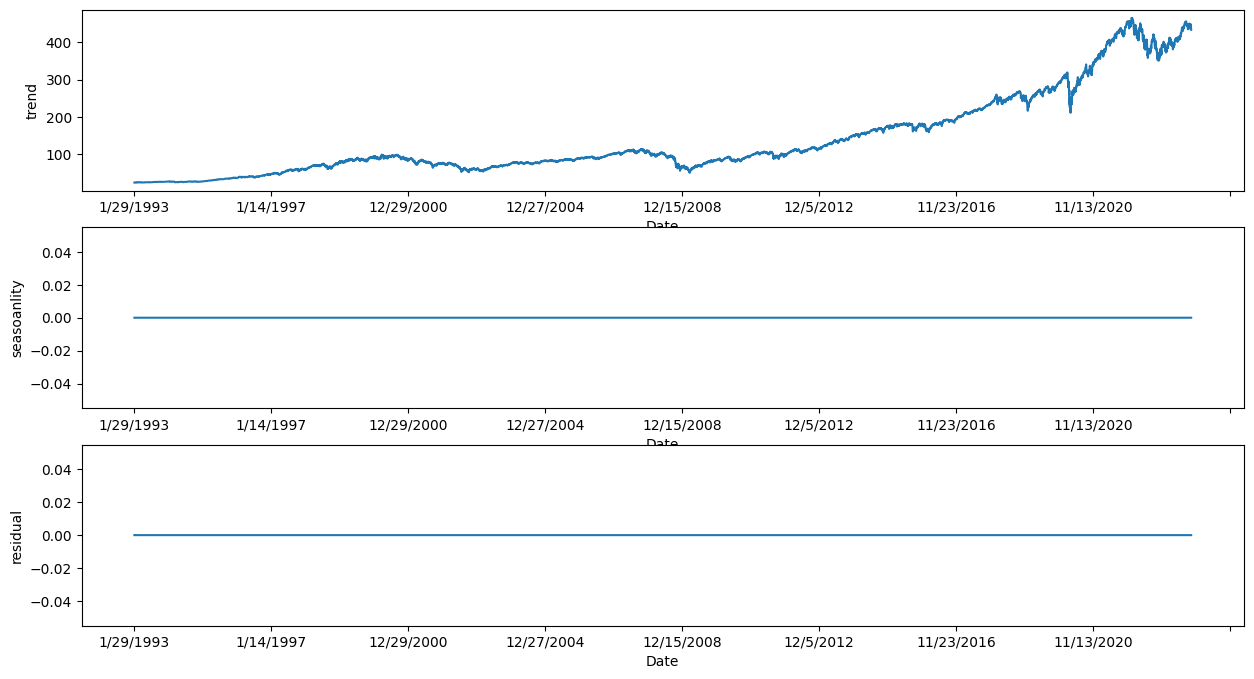

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

res = seasonal_decompose(spyData.Close, model = "additive",period = 1)

fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(15,8))
res.trend.plot(ax=ax1,ylabel = "trend")
res.resid.plot(ax=ax2,ylabel = "seasoanlity")
res.seasonal.plot(ax=ax3,ylabel = "residual")
plt.show()

**Auto-Correlation Function (ACF)**

- ACF indicates how similar a value is within a given time series and the previous value. (OR) It measures the degree of the similarity between a given time series and the lagged version of that time series at the various intervals we observed.

- Python Statsmodels library calculates autocorrelation. It identifies a set of trends in the given dataset and the influence of former observed values on the currently observed values.

- In an ACF plot, the x-axis represents lags, and the y-axis represents the magnitude of the auto-correlation. The plot shows how correlated each lag is with the current observation.

- Positive ACF values indicate positive autocorrelation (similar trends or patterns repeating), while negative ACF values indicate negative autocorrelation (opposite trends or patterns repeating).

- The first lag (lag 1) often indicates the strength of the linear relationship between consecutive observations, while subsequent lags provide information about longer-term dependencies.


---



**Partial Auto-Correlation (PACF)**

- Measures the correlation between an observation and its past values at a specific lag, while accounting for the influence of all shorter lags.

- Always shows the correlation of the sequence with itself with some number of time units per sequence order in which only the direct effect has been shown, and all other intermediary effects are removed from the given time series

- In a PACF plot, significant spikes or values significantly different from zero at specific lags indicate potential lags that have a direct impact on the current observation.
- For example, if the PACF plot shows a significant spike at lag 3, it suggests that the current observation is directly influenced by the observation three time points ago, while controlling for the effects of observations at time points in between.


---


**Use in forecasting**
- identify appropriate lag values for autoregressive (AR) models in time series forecasting, such as ARIMA (AutoRegressive Integrated Moving Average) models.

- Significant ACF values at certain lags may suggest the presence of autoregressive or moving average components in a time series model.

https://youtu.be/DeORzP0go5I

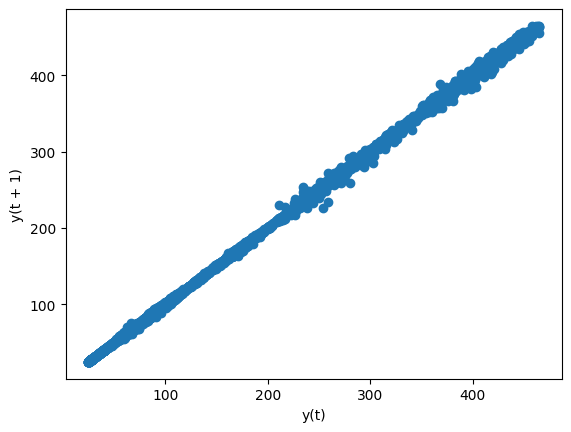

In [ ]:
from matplotlib import pyplot
from pandas.plotting import lag_plot
lag_plot(spyData.Close)
pyplot.show()

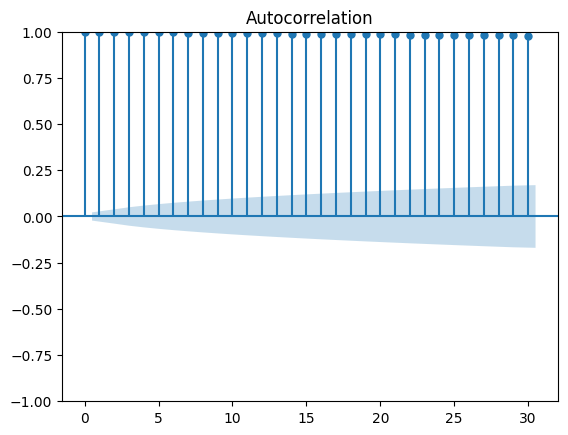

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(spyData.Close, lags=30)
plt.show()


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

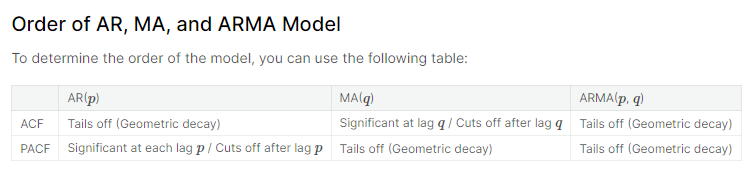

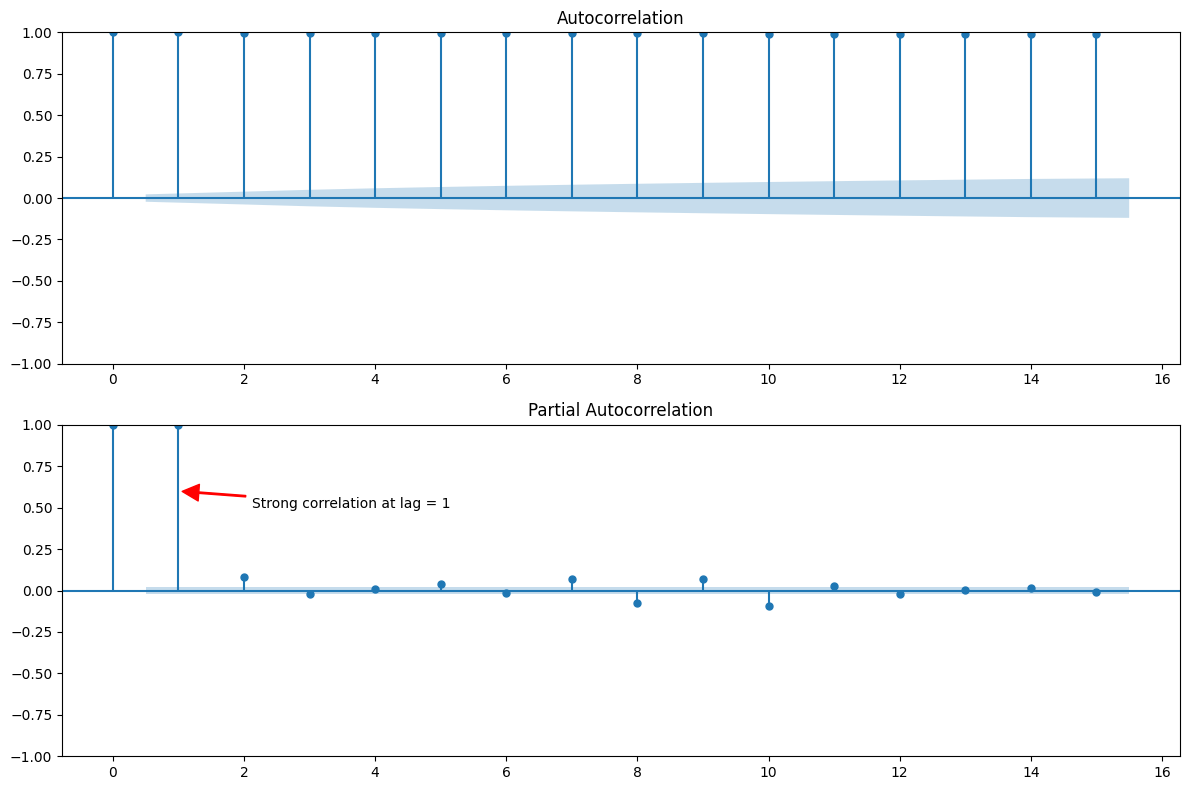

In [ ]:
lag_acf = 15
lag_pacf = 15
height = 4
width = 12
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(width, 2*height))
plot_acf(spyData.Close,lags=lag_acf, ax=ax[0])
plot_pacf(spyData.Close,lags=lag_pacf, ax=ax[1], method='ols')

ax[1].annotate('Strong correlation at lag = 1', xy=(1, 0.6),  xycoords='data',
            xytext=(0.17, 0.75), textcoords='axes fraction',
            arrowprops=dict(color='red', shrink=0.05, width=1))

plt.tight_layout()
plt.show()

# MACD (Moving Average Convergence/Divergence)
- A technical indicator used by traders and analysts in financial markets to assess the strength and direction of a trend.

- The numbers "12" and "26" in "MACD 12-26" refer to the specific settings used for these two components.

**MACD Line (12-period EMA - 26-period EMA):**
- EMA stands for Exponential Moving Average, which is a type of moving average that gives more weight to recent data points. The "12" and "26" represent the number of periods (usually days) used to calculate the EMA for two different timeframes.

- 12-period EMA is calculated by taking the average of the closing prices over the past 12 periods (days, weeks, etc.).

- The 26-period EMA is calculated in the same way but uses a longer timeframe,
considering the average of the closing prices over the past 26 periods.

**How the MACD 12-26 Works:**

- The MACD 12-26 subtracts the 26-period EMA from the 12-period EMA, resulting in the MACD line.

- Traders often use crossovers between the MACD line and the signal line as trading signals. When the MACD line crosses above the signal line, it can be considered a bullish signal (suggesting a potential upward trend), and when the MACD line crosses below the signal line, it can be considered a bearish signal (suggesting a potential downward trend).

- Additionally, traders may look at the distance between the MACD line and the signal line (histogram) to gauge the strength of the trend. A widening histogram indicates increasing momentum, while a narrowing histogram suggests weakening momentum
---


# Signal Line (9-period EMA of the MACD Line):

- The signal line is a 9-period EMA of the MACD line. It smooths out the MACD line and helps traders identify potential buy and sell signals.

- The signal line is calculated by taking the average of the MACD line values over the past 9 periods.

In [ ]:
spyData.head(10)

,Open,High,Low,Close,"MACD(12,26)",Sig(9),SMA5,CMA,EMA_0.1,EMA_0.3
Date,,,,,,,,,,
1/29/1993,24.9646,24.9646,24.8404,24.9468,0.0000,0.0000,NaN,24.946800,24.946800,24.946800
2/1/1993,24.9646,25.1243,24.9646,25.1243,0.0142,0.0028,NaN,25.035550,24.964550,25.000050
2/2/1993,25.1065,25.1952,25.0533,25.1775,0.0293,0.0081,NaN,25.082867,24.985845,25.053285
2/3/1993,25.2130,25.4614,25.1952,25.4437,0.0621,0.0189,NaN,25.173075,25.031631,25.170409
2/4/1993,25.5324,25.6033,25.4791,25.5501,0.0956,0.0343,25.24848,25.248480,25.083477,25.284317
2/5/1993,25.5324,25.5856,25.3904,25.5324,0.1193,0.0513,25.36560,25.295800,25.128370,25.358742
2/8/1993,25.5324,25.6211,25.4969,25.5324,0.1365,0.0683,25.44722,25.329600,25.168773,25.410839
2/9/1993,25.4437,25.4437,25.3017,25.3549,0.1343,0.0815,25.48270,25.332763,25.187385,25.394057
2/10/1993,25.3549,25.4082,25.2840,25.3904,0.1339,0.0920,25.47204,25.339167,25.207687,25.392960


# Step 1: Predictor
- Building an RNN model that can predict the subsequent data with suffcient accuracy.

In [ ]:
# Setting 80 percent data for training
training_data_len = math.ceil(len(spyData) * .8)
training_data_len

#Splitting the dataset
train_data = spyData[:training_data_len].iloc[:,3:4]
test_data = spyData[training_data_len:].iloc[:,3:4]
print(train_data.shape, test_data.shape)

(6174, 1) (1543, 1)


In [ ]:
print(train_data)

              Close
Date               
1/29/1993   24.9468
2/1/1993    25.1243
2/2/1993    25.1775
2/3/1993    25.4437
2/4/1993    25.5501
...             ...
7/28/2017  221.9650
7/31/2017  221.8391
8/1/2017   222.3336
8/2/2017   222.4414
8/3/2017   222.0099

[6174 rows x 1 columns]


In [ ]:
# Selecting Open Price values
dataset_train = train_data.Close.values
# Reshaping 1D to 2D array
dataset_train = np.reshape(dataset_train, (-1,1))
dataset_train.shape

(6174, 1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
# scaling dataset
scaled_train = scaler.fit_transform(dataset_train)

print(scaled_train[45:52])


[[0.00320279]
 [0.00284232]
 [0.00329278]
 [0.0031128 ]
 [0.00491516]
 [0.00518564]
 [0.00500515]]


In [ ]:
# Selecting Close Price values
dataset_test = test_data.Close.values
# Reshaping 1D to 2D array
dataset_test = np.reshape(dataset_test, (-1,1))
# Normalizing values between 0 and 1
scaled_test = scaler.fit_transform(dataset_test)
print(scaled_test[:5])


[[0.04330971]
 [0.04494096]
 [0.04277753]
 [0.04274202]
 [0.030365  ]]


In [ ]:
X_train = []
y_train = []
for i in range(50, len(scaled_train)):
	X_train.append(scaled_train[i-50:i, 0])
	y_train.append(scaled_train[i, 0])
	if i <= 51:
		print(X_train)
		print(y_train)
		print()

[array([1.52480179e-03, 2.42219011e-03, 2.69115382e-03, 4.03698352e-03,
       4.57491094e-03, 4.48542490e-03, 4.48542490e-03, 3.58803658e-03,
       3.76751424e-03, 4.39543328e-03, 3.40906448e-03, 1.79477664e-04,
       8.99916176e-05, 0.00000000e+00, 4.48441376e-04, 8.96882751e-04,
       8.07396704e-04, 2.42219011e-03, 2.69115382e-03, 2.87063149e-03,
       2.51167616e-03, 4.39543328e-03, 4.93386627e-03, 4.21595561e-03,
       3.85750586e-03, 6.72763177e-03, 6.27919040e-03, 6.54865968e-03,
       6.18970435e-03, 4.84387465e-03, 5.47179369e-03, 5.47179369e-03,
       4.66490256e-03, 5.47179369e-03, 5.27563219e-03, 4.55468811e-03,
       4.82516853e-03, 4.82516853e-03, 5.63610423e-03, 4.91516015e-03,
       5.45612100e-03, 5.81659304e-03, 5.72660142e-03, 5.27563219e-03,
       2.57183909e-03, 3.20279156e-03, 2.84231952e-03, 3.29278318e-03,
       3.11279994e-03, 4.91516015e-03])]
[0.005185640573479172]

[array([1.52480179e-03, 2.42219011e-03, 2.69115382e-03, 4.03698352e-03,
       4.5

In [ ]:
X_test = []
y_test = []
for i in range(50, len(scaled_test)):
	X_test.append(scaled_test[i-50:i, 0])
	y_test.append(scaled_test[i, 0])


In [ ]:
# The data is converted to Numpy array
X_train, y_train = np.array(X_train), np.array(y_train)

#Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))
print("X_train :",X_train.shape,"y_train :",y_train.shape)


X_train : (6124, 50, 1) y_train : (6124, 1)


In [ ]:
# The data is converted to numpy array
X_test, y_test = np.array(X_test), np.array(y_test)

#Reshaping
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
y_test = np.reshape(y_test, (y_test.shape[0],1))
print("X_test :",X_test.shape,"y_test :",y_test.shape)


X_test : (1493, 50, 1) y_test : (1493, 1)


In [ ]:
X_test[0][:][0]

array([0.04330971])

In [ ]:
# importing libraries
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout
from keras.layers import GRU, Bidirectional
from keras.optimizers import SGD
from sklearn import metrics
from sklearn.metrics import mean_squared_error

In [ ]:
# initializing the RNN
regressor = Sequential()

# adding RNN layers and dropout regularization
regressor.add(SimpleRNN(units = 50,
						activation = "tanh",
						return_sequences = True,
						input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(SimpleRNN(units = 50,
						activation = "tanh",
						return_sequences = True))

regressor.add(SimpleRNN(units = 50,
						activation = "tanh",
						return_sequences = True))

regressor.add( SimpleRNN(units = 50))

# adding the output layer
regressor.add(Dense(units = 1,activation='sigmoid'))

# compiling RNN
regressor.compile(optimizer = SGD(learning_rate=0.01,

								momentum=0.9,
								nesterov=True),
				loss = "mean_squared_error")

# fitting the model
regressor.fit(X_train, y_train, epochs = 20, batch_size = 2)
regressor.summary()


Epoch 1/20
3062/3062 [==============================] - 130s 41ms/step - loss: 0.0019
Epoch 2/20
3062/3062 [==============================] - 123s 40ms/step - loss: 3.3289e-04
Epoch 3/20
3062/3062 [==============================] - 124s 40ms/step - loss: 2.6755e-04
Epoch 4/20
3062/3062 [==============================] - 123s 40ms/step - loss: 2.2201e-04
Epoch 5/20
3062/3062 [==============================] - 122s 40ms/step - loss: 2.1199e-04
Epoch 6/20
3062/3062 [==============================] - 123s 40ms/step - loss: 1.9361e-04
Epoch 7/20
3062/3062 [==============================] - 123s 40ms/step - loss: 1.9363e-04
Epoch 8/20
3062/3062 [==============================] - 123s 40ms/step - loss: 1.8103e-04
Epoch 9/20
3062/3062 [==============================] - 122s 40ms/step - loss: 1.7202e-04
Epoch 10/20
3062/3062 [==============================] - 124s 40ms/step - loss: 1.6073e-04
Epoch 11/20
3062/3062 [==============================] - 123s 40ms/step - loss: 1.6718e-04
Epoch 12/20


In [ ]:
regressor.save('Models/simpleRNN.keras')

In [ ]:
y_RNN = regressor.predict(X_test)
y_RNN_O = scaler.inverse_transform(y_RNN)


47/47 [==============================] - 1s 14ms/step


In [ ]:
rnnResults= pd.DataFrame({ "Date" : test_data.index[:len(y_RNN_O)],"Close":y_RNN_O[:,0],})
rnnResults.set_index("Date",inplace=True)
rnnResults.to_csv("rnnPrediction-1.csv")

In [ ]:
fig = go.Figure()


fig.add_trace(go.Scatter(
    x=pd.to_datetime(test_data.index),
    y=test_data["Close"],
    mode='lines',
    name='Test Data'
))
fig.update_layout(title="Model Predictions Simple RNN")
fig.add_trace(go.Scatter(
    x=pd.to_datetime(train_data.index),
    y=train_data["Close"],
    mode='lines',
    name='Train Data'
))
fig.add_trace(go.Scatter(
    x=pd.to_datetime(test_data.index),
    y=pd.DataFrame(y_RNN_O)[0],
    mode='lines',
    name='Prediction'
))


In [ ]:
#Initialising the model
regressorGRU = Sequential()

# GRU layers with Dropout regularisation
regressorGRU.add(GRU(units=50,
					return_sequences=True,
					input_shape=(X_train.shape[1],1),
					activation='tanh'))
regressorGRU.add(Dropout(0.2))

regressorGRU.add(GRU(units=50,
					return_sequences=True,
					activation='tanh'))

regressorGRU.add(GRU(units=50,
					return_sequences=True,
					activation='tanh'))

regressorGRU.add(GRU(units=50,
					activation='tanh'))

# The output layer
regressorGRU.add(Dense(units=1,
					activation='relu'))
# Compiling the RNN
regressorGRU.compile(optimizer=SGD(learning_rate=0.01,
								momentum=0.9,
								nesterov=False),
					loss='mean_squared_error')

# Fitting the data
regressorGRU.fit(X_train,y_train,epochs=20,batch_size=1)
regressorGRU.summary()


Epoch 1/20
6124/6124 [==============================] - 299s 48ms/step - loss: 0.1706
Epoch 2/20
6124/6124 [==============================] - 294s 48ms/step - loss: 0.1707
Epoch 3/20
6124/6124 [==============================] - 292s 48ms/step - loss: 0.1707
Epoch 4/20
6124/6124 [==============================] - 292s 48ms/step - loss: 0.1707
Epoch 5/20
6124/6124 [==============================] - 292s 48ms/step - loss: 0.1707
Epoch 6/20
6124/6124 [==============================] - 292s 48ms/step - loss: 0.1707
Epoch 7/20
6124/6124 [==============================] - 301s 49ms/step - loss: 0.1707
Epoch 8/20
6124/6124 [==============================] - 297s 48ms/step - loss: 0.1707
Epoch 9/20
6124/6124 [==============================] - 294s 48ms/step - loss: 0.1707
Epoch 10/20
6124/6124 [==============================] - 294s 48ms/step - loss: 0.1707
Epoch 11/20
6124/6124 [==============================] - 286s 47ms/step - loss: 0.1707
Epoch 12/20
6124/6124 [=============================

In [ ]:
y_GRU = regressor.predict(X_test)
y_GRU_O = scaler.inverse_transform(y_GRU)

47/47 [==============================] - 3s 35ms/step


In [ ]:
gruResults= pd.DataFrame({ "Date" : test_data.index[:len(y_GRU_O)],"Close":y_GRU_O[:,0],})
gruResults.set_index("Date",inplace=True)
gruResults.to_csv("gruPrediction-1.csv")

In [ ]:
fig = go.Figure()


fig.add_trace(go.Scatter(
    x=pd.to_datetime(test_data.index),
    y=test_data["Close"],
    mode='lines',
    name='Test Data'
))
fig.update_layout(title="Model Predictions Gated Reccurent Unit")
fig.add_trace(go.Scatter(
    x=pd.to_datetime(train_data.index),
    y=train_data["Close"],
    mode='lines',
    name='Train Data'
))
fig.add_trace(go.Scatter(
    x=pd.to_datetime(test_data.index),
    y=pd.DataFrame(y_GRU_O)[0],
    mode='lines',
    name='Prediction'
))


In [ ]:
#Initialising the model
regressorLSTM = Sequential()

#Adding LSTM layers
regressorLSTM.add(LSTM(50,
					return_sequences = True,
					input_shape = (X_train.shape[1],1)))
regressorLSTM.add(LSTM(50,
					return_sequences = False))
regressorLSTM.add(Dense(25))

#Adding the output layer
regressorLSTM.add(Dense(1))

#Compiling the model
regressorLSTM.compile(optimizer = 'adam',
					loss = 'mean_squared_error',
					metrics = ["accuracy"])

#Fitting the model
regressorLSTM.fit(X_train,
				y_train,
				batch_size = 1,
				epochs = 12)
regressorLSTM.summary()


Epoch 1/12
6124/6124 [==============================] - 166s 26ms/step - loss: 5.0955e-04 - accuracy: 1.6329e-04
Epoch 2/12
6124/6124 [==============================] - 157s 26ms/step - loss: 1.9480e-04 - accuracy: 1.6329e-04
Epoch 3/12
6124/6124 [==============================] - 154s 25ms/step - loss: 1.1878e-04 - accuracy: 1.6329e-04
Epoch 4/12
6124/6124 [==============================] - 157s 26ms/step - loss: 1.1107e-04 - accuracy: 1.6329e-04
Epoch 5/12
6124/6124 [==============================] - 157s 26ms/step - loss: 1.0857e-04 - accuracy: 1.6329e-04
Epoch 6/12
6124/6124 [==============================] - 158s 26ms/step - loss: 1.0664e-04 - accuracy: 1.6329e-04
Epoch 7/12
6124/6124 [==============================] - 158s 26ms/step - loss: 9.2265e-05 - accuracy: 1.6329e-04
Epoch 8/12
 478/6124 [=>............................] - ETA: 2:27 - loss: 5.4550e-05 - accuracy: 0.0000e+00

In [ ]:
cnt=4

In [ ]:
regressorLSTM.save('Models/LSTM-'+str(cnt)+'.keras')

In [ ]:
y_LTSM = regressorLSTM.predict(X_test)
y_LTSM_O = scaler.inverse_transform(y_LTSM)

In [ ]:
lstmResults= pd.DataFrame({ "Date" : test_data.index[:len(y_LTSM_O)],"Close":y_LTSM_O[:,0],})
lstmResults.set_index("Date",inplace=True)
lstmResults.to_csv("lstmPrediction-"+str(cnt)+".csv")

In [ ]:
fig = go.Figure()


fig.add_trace(go.Scatter(
    x=pd.to_datetime(test_data.index),
    y=test_data["Close"],
    mode='lines',
    name='Test Data'
))
fig.update_layout(title="Model Predictions Long-Short Term Memory")
fig.add_trace(go.Scatter(
    x=pd.to_datetime(train_data.index),
    y=train_data["Close"],
    mode='lines',
    name='Train Data'
))
fig.add_trace(go.Scatter(
    x=pd.to_datetime(test_data.index),
    y=pd.DataFrame(y_LTSM_O)[0],
    mode='lines',
    name='Prediction'
))


In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam, RMSprop, SGD
from keras.initializers import glorot_uniform, he_normal
from keras.callbacks import EarlyStopping

# Define your LSTM model as a function
def create_lstm_model(
    num_layers=1,
    units=50,
    dropout_rate=0.2,
    optimizer='adam',
    activation='relu',
    sequence_length=10,
    learning_rate=0.001,
    gradient_clipping=None,
    batch_size=32,
    weight_initialization='glorot_uniform'
):
    model = Sequential()

    for _ in range(num_layers):
        model.add(LSTM(units, return_sequences=True, input_shape=(sequence_length, X_train.shape[2])))
        if gradient_clipping is not None:
            model.add(LSTM(units, return_sequences=True, recurrent_activation=activation, recurrent_initializer=weight_initialization))
            model.add(LSTM(units, recurrent_activation=activation, recurrent_initializer=weight_initialization))
        model.add(Dropout(dropout_rate))

    if gradient_clipping is None:
        model.add(LSTM(units))
    else:
        model.add(LSTM(units, recurrent_activation=activation, recurrent_initializer=weight_initialization))
    model.add(Dropout(dropout_rate))

    model.add(Dense(1, activation=activation))

    # Define optimizer with custom learning rate if needed
    if optimizer == 'adam':
        optimizer = Adam(learning_rate=learning_rate)
    elif optimizer == 'rmsprop':
        optimizer = RMSprop(learning_rate=learning_rate)
    elif optimizer == 'sgd':
        optimizer = SGD(learning_rate=learning_rate)

    # Apply gradient clipping if specified
    if gradient_clipping is not None:
        from keras.constraints import max_norm
        optimizer = SGD(learning_rate=learning_rate, clipnorm=gradient_clipping)

    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Split your data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the KerasClassifier wrapper for scikit-learn
model = Sequential(build_fn=create_lstm_model, verbose=0)
model = create_lstm_model(ap)

# Define the hyperparameter grid for Grid Search
param_grid = {
    'num_layers': [1, 2, 3],                  # Vary the number of LSTM layers
    'units': [50, 100],
    'dropout_rate': [0.2, 0.3],
    'optimizer': ['adam', 'rmsprop', 'sgd'],  # Different optimizers
    'activation': ['relu', 'tanh','sigmoid'],
    'sequence_length': [10, 20, 30],          # Vary sequence length
    'learning_rate': [0.001, 0.01],          # Vary learning rates
    'gradient_clipping': [None, 1.0],        # Gradient clipping
    'batch_size': [32, 64],                  # Vary batch sizes
    'weight_initialization': ['glorot_uniform', 'he_normal'],  # Weight initialization
    'epochs': [10, 20, 30],                 # Number of training epochs
    'early_stopping': [False, True],         # Early stopping
}

# Define early stopping callback
early_stopping_callback = EarlyStopping(patience=5, restore_best_weights=True)

# Perform Grid Search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, verbose=2, n_jobs=-1, scoring='accuracy',
                           fit_params={'callbacks': [early_stopping_callback]})

grid_search.fit(X_train, y_train)

# Print the best hyperparameters and their corresponding performance
print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: {:.2f}%".format(grid_search.best_score_ * 100))


ModuleNotFoundError: ignored

In [ ]:
#This algo tests Atul's ML output
import pandas as pd
from datetime import datetime
from matplotlib import pyplot as plt
# Lets read in SPY data

SPYdf = pd.read_csv("spydata.csv")
print(SPYdf.head())

for i in range(0,len(SPYdf)):
    SPYdf.loc[i,'Date'] = datetime.strptime(SPYdf.loc[i,'Date'],'%m/%d/%Y')



# Lets read in the output from the Predictor
rnnOut = pd.read_csv("rnnPrediction-1.csv")
print(rnnOut.head())

for i in range(0,len(rnnOut)):
    rnnOut.loc[i,'Date'] = datetime.strptime(rnnOut.loc[i,'Date'],'%m/%d/%Y')
print(rnnOut.head())

Date1 = rnnOut.iloc[0,0]
Date2 = rnnOut.loc[len(rnnOut)-1,'Date']
print(type(Date1))
print(Date1)
print(Date2)
SPYdf = SPYdf[(SPYdf['Date']>=Date1) & (SPYdf['Date']<=Date2)]
SPYdf = SPYdf.reset_index()
print(SPYdf.head())
print(SPYdf.iloc[len(SPYdf)-1])



# Test1: Lets do a simple test
# Lets see how effective the predictor data is on predicting trends

# This is time the trade is held
HoldTime = 3
# If at time to the predictor value for the next hold period is higher, we go long else we go short

ReturnList = list()
indexList = list()
PositionData = list()
for i in range(HoldTime,len(rnnOut),HoldTime):
    if rnnOut.loc[i,'Close'] - rnnOut.loc[i-HoldTime,'Close'] > 0:
        # Assumes we buy at the prior evening's close and take out at the next days close
        Return = (SPYdf.loc[i,'Close']-SPYdf.loc[i-HoldTime,'Close'])/SPYdf.loc[i-HoldTime,'Close']
        ReturnList.append(Return)
        indexList.append(i)
        for j in range(i-HoldTime,i):
            PositionData.append(1)
    else:
        # Go short
        Return = (-SPYdf.loc[i, 'Close'] + SPYdf.loc[i-HoldTime, 'Close']) / SPYdf.loc[i-HoldTime, 'Close']
        ReturnList.append(Return)
        indexList.append(i)
        for j in range(i-HoldTime,i):
            PositionData.append(-1)

fig = plt.figure()
plt.plot(ReturnList,'*')


print("Sum of all daily returns = ",sum(ReturnList))
print("Max daily return = ", max(ReturnList))
print("Min daily return = ", min(ReturnList))
CompRet = 1
CompRetList = list()
for i in range(0,len(ReturnList)):
    if i == 0:
        CompRet = (1+ReturnList[i])
    else:
        CompRet = CompRet * (1+ReturnList[i])
    CompRetList.append(CompRet)

fig = plt.figure()
plt.plot(CompRetList)



SPYReturnList = list()
AlgoReturnList = list()
print("Length of Position Data: ",len(PositionData))
print("Lenght of SPY: ", len(SPYdf))


for i in range(0,len(PositionData)-1):
    if PositionData[i] == 1:
        AlgoReturn = (SPYdf.loc[i+1,'Close']-SPYdf.loc[i,'Close'])/SPYdf.loc[i,'Close']
    else:
        AlgoReturn = (-SPYdf.loc[i + 1, 'Close'] + SPYdf.loc[i,'Close']) / SPYdf.loc[i,'Close']
    Return = (SPYdf.loc[i+1,'Close']-SPYdf.loc[i,'Close'])/SPYdf.loc[i,'Close']
    AlgoReturnList.append(AlgoReturn)
    SPYReturnList.append(Return)

CompRetAlgoList = list()
CompRetSPList = list()
CompRetAlgo = 1
CompRetSP = 1
for i in range(0,len(AlgoReturnList)):
    if i==0:
        CompRetAlgo = (1+AlgoReturnList[i])
    else:
        CompRetAlgo = CompRetAlgo * (1+AlgoReturnList[i])

    CompRetAlgoList.append(CompRetAlgo)

    if i == 0:
        CompRetSP = (1 + SPYReturnList[i])
    else:
        CompRetSP = CompRetSP * (1 + SPYReturnList[i])

    CompRetSPList.append(CompRetSP)


fig = plt.figure()
plt.plot(CompRetAlgoList,'r')
plt.plot(CompRetSPList,'b')

plt.show()












